<a href="https://colab.research.google.com/github/MarioBolanos/AnalisisNumerico/blob/master/Optimization_in_Electrical_Engineering_Cap_3_Set_Constrained_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Least squares


Consider a wireless communication channel in Fig. 3.6 with transmit power $p_t$. The received power pr in decibel ($dB$) is derived using the model:

> $p_r = p_t + K − 10\gamma log_{10} d$

where K is a constant depending on the radio frequency and antennas gains, $\gamma$ is the path loss exponent, and $d$ in meters is the distance between the transmitter and the receiver. In a set of empirical measurements of $pr−pt$ in $dB$, given in Table 3.1, find constants $K$ and $\gamma$ to minimize the mean square error between the model and the empirical measurements.

Let’s define $M_{model} = p_r−p_t = K−10\gamma log_{10} d$ and $M_{measure} = p_r−p_t$ given in Table 3.1.
The mean square error is

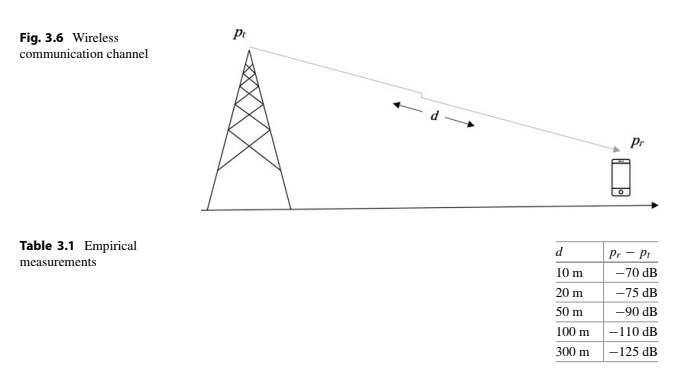

$b=Ax$




$M_{measure}=\begin{bmatrix}
1 & -10log_{10}d
\end{bmatrix}\begin{bmatrix}
K \\ \gamma
\end{bmatrix}$


$\begin{bmatrix}
 -70 \\ -75 \\ -90 \\ -110 \\ -125 
\end{bmatrix}=\begin{bmatrix}
  1 & -10log_{10}10\\
  1 & -10log_{10}20\\
  1 & -10log_{10}50\\
  1 & -10log_{10}100\\
  1 & -10log_{10}300
\end{bmatrix}\begin{bmatrix}
 K \\ \gamma
\end{bmatrix}$

$\begin{matrix}
A=\begin{bmatrix}
  1 & -10log_{10}10\\
  1 & -10log_{10}20\\
  1 & -10log_{10}50\\
  1 & -10log_{10}100\\
  1 & -10log_{10}300
\end{bmatrix} & x=\begin{bmatrix}
 K \\ \gamma
\end{bmatrix} & b =\begin{bmatrix}
 -70 \\ -75 \\ -90 \\ -110 \\ -125 
\end{bmatrix}
\end{matrix}
$

$x^*=(A^T A)^{−1}A^T b,$

## Programación de los metodos

In [ ]:
import numpy as np
import math

In [ ]:
def LSO(A,b): #Least square optimization
  return np.linalg.inv(A.T@A)@A.T@b


## Ejecución del ejemplo

In [ ]:
A = np.array([[1 ,- 10*math.log10(10)], 
     [1 ,- 10*math.log10(20)],
     [1 ,- 10*math.log10(50)],
     [1 ,- 10*math.log10(100)],
     [1 ,- 10*math.log10(300)]])



In [ ]:
b = np.array([[-70],
    [-75],
    [-90],
    [-110],
    [-125]])

In [ ]:
LSO(A,b)

array([[-26.7439583 ],
       [  3.96691516]])

#Steepest Descent Method

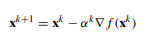

## Programación del método

In [ ]:
from scipy import optimize

### Gradiente desendiente paso fijo

In [ ]:
def gd1(x, a, max_iter, epsi): #Gradiente desendiente paso fijo    
  #Entradas:
    #x: x0 valor inicial. 
    #a: tamaño de paso fijo
    #max_iter: número máximo de iteraciones permitidas.
    #epsi: tolerancia del método
  #Salidas:
    #xs: vector con los xk hallados
    #i+1: número de iteraciones realizadas
  xs = np.zeros((1 + max_iter, 2))
  xs[0,:] = x
  for i in range(max_iter): #iterar hasta maximo número de iteraciones
      x = x - a * grad(x[0],x[1])
      xs[i+1,:] = x
      error = abs(f(xs[i+1,0],xs[i+1,1])-f(xs[i,0],xs[i,1]))/max(1,abs(f(xs[i,0],xs[i,1])))
      if error < epsi:
        break
  return xs,i+1

### Gradiente desendiente paso optimizado

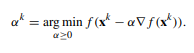

In [ ]:
def gd2(x, max_iter, epsi): #Gradiente desendiente paso optimizado. 
  #Entradas:
    #x: x0 valor inicial. 
    #max_iter: número máximo de iteraciones permitidas.
    #epsi: tolerancia del método
  #Salidas:
    #xs: vector con los xk hallados
    #i+1: número de iteraciones realizadas

  xs = np.zeros((1 + max_iter, 2))
  xs[0,:] = x  

  for i in range(max_iter): #iterar hasta maximo número de iteraciones
    g = grad(x[0],x[1]) #Cálculo del gradiente de xk

    def phi(s): #Función a minimiza para hallar tamaño de paso óptimo
      return f(x[0]-s*g[0],x[1]-s*g[1])

    a = optimize.fminbound(phi, 0, 10) #Método para encontrar el tamaño de paso óptimo

    x = x - a * g #Cálculo de x_{k+1}
    xs[i+1,:] = x

    error = abs(f(xs[i+1,0],xs[i+1,1])-f(xs[i,0],xs[i,1]))/max(1,abs(f(xs[i,0],xs[i,1]))) #Cálculo del error
    if error < epsi: #Verificar error
      break
  return xs,i+1

## Example 8
Find the minimizer of $f (x) = x_1e^{−(x_1^2+x_2^2 )}$.

In [ ]:
def f(x1,x2): #Función objetivo
    return x1*np.exp(-x1**2-x2**2)

In [ ]:
def grad(x1,x2): #Gradiente de f
    return np.array([-2*x1**2*np.exp(-x1**2 - x2**2) + np.exp(-x1**2 - x2**2), -2*x1*x2*np.exp(-x1**2 - x2**2)])

### Gradiente desendiente paso fijo



In [ ]:
x = np.array([-1,1])
max_iter = 1000
epsi = 0.001;
a = 0.25

In [ ]:
xs1,i1 = gd1(x, a, max_iter,epsi)

-0.7076878221075938 0.05661084383490203


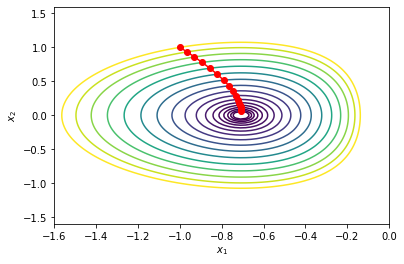

In [ ]:
xx = np.linspace(-1.6, 0, 64)
yy = np.linspace(-1.6, 1.6, 128)
X, Y = np.meshgrid(xx, yy)
Z = X*np.exp(-X**2-Y**2)
function_value=f(xs1[0:i1+1,0],xs1[0:i1+1,1])
c = plt.contour(X, Y, Z,np.flip(function_value))
plt.plot(xs1[0:i1+1,0],xs1[0:i1+1,1] , '-ro')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
print(xs1[i1,0],xs1[i1,1])

Text(0, 0.5, 'f(x)')

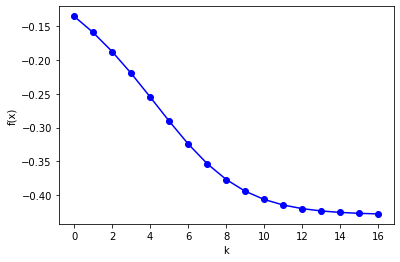

In [ ]:
plt.plot(f(xs1[0:i1+1,0],xs1[0:i1+1,1]),'-bo')
plt.xlabel('k')
plt.ylabel('f(x)')

### Gradiente desendiente paso optimizado

In [ ]:
x = np.array([-1,1])
epsi = 0.001;
max_iter = 1000

In [ ]:
xs2,i2 = gd2(x, max_iter, epsi)

-0.7084550706365015 0.005388249941177411


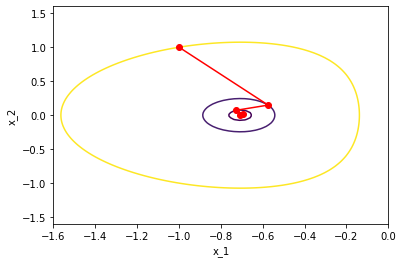

In [ ]:
xx = np.linspace(-1.6, 0, 64)
yy = np.linspace(-1.6, 1.6, 128)
X, Y = np.meshgrid(xx, yy)
Z = X*np.exp(-X**2-Y**2)
function_value=f(xs2[0:i2+1,0],xs2[0:i2+1,1])
c = plt.contour(X, Y, Z,np.flip(function_value))
plt.plot(xs2[0:i2+1,0],xs2[0:i2+1,1],'-ro')
plt.xlabel('x_1')
plt.ylabel('x_2')
print(xs2[i2,0],xs2[i2,1])

Text(0, 0.5, 'f(x)')

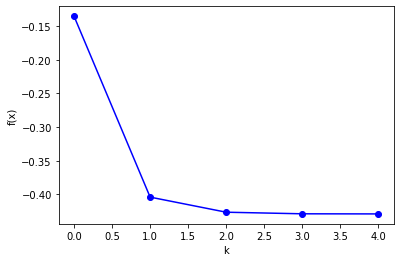

In [ ]:
plt.plot(f(xs2[0:i2+1,0],xs2[0:i2+1,1]),'-bo')
plt.xlabel('k')
plt.ylabel('f(x)')

## Example 9
Find the minimizer of $f (x) = 0.06e^{2x_1+x_2} + 0.05e^{x_1−2x_2} + e^{−x1}$.

In [ ]:
def f(x1,x2): #Función objetivo
    return 0.06*np.exp(2*x1+x2) + 0.05*np.exp(x1-2*x2) + np.exp(-x1)

In [ ]:
def grad(x1,x2): #Gradiente de f
    return np.array([-np.exp(-x1) + 0.12*np.exp(2*x1 + x2) + 0.05*np.exp(x1 - 2*x2), 0.06*np.exp(2*x1+x2) - 0.1*np.exp(x1-2*x2)])

### Gradiente desendiente paso fijo



In [ ]:
x = np.array([-0.5,2])
max_iter = 1000
epsi = 0.001;
a = 0.25

NameError: ignored

In [ ]:
xs1,i1 = gd1(x, a, max_iter,epsi)

NameError: ignored

In [ ]:
xx = np.linspace(-1, 1.75, 27)
yy = np.linspace(-2, 3.5, 55)
X, Y = np.meshgrid(xx, yy)
Z = 0.06*np.exp(2*X+Y) + 0.05*np.exp(X-2*Y) + np.exp(-X)
function_value=f(xs1[0:i1+1,0],xs1[0:i1+1,1])
c = plt.contour(X, Y, Z,np.flip(function_value))
plt.plot(xs1[0:i1+1,0],xs1[0:i1+1,1] , '-ro')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
print(xs1[i1,0],xs1[i1,1])

In [ ]:
plt.plot(f(xs1[0:i1+1,0],xs1[0:i1+1,1]),'-bo')
plt.xlabel('k')
plt.ylabel('f(x)')

### Gradiente desendiente paso optimizado

In [ ]:
x = np.array([-0.5,2])
epsi = 0.001;
max_iter = 1000

In [ ]:
xs2,i2 = gd2(x, max_iter, epsi)

0.6458865589511575 -0.028235701492649593


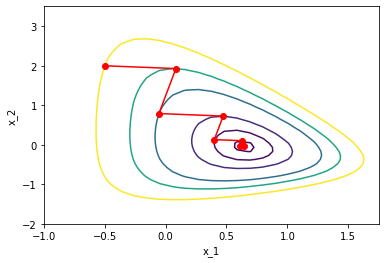

In [ ]:
xx = np.linspace(-1, 1.75, 27)
yy = np.linspace(-2, 3.5, 55)
X, Y = np.meshgrid(xx, yy)
Z = 0.06*np.exp(2*X+Y) + 0.05*np.exp(X-2*Y) + np.exp(-X)

function_value=f(xs2[0:i2+1,0],xs2[0:i2+1,1])
c = plt.contour(X, Y, Z,np.flip(function_value))

plt.plot(xs2[0:i2+1,0],xs2[0:i2+1,1],'-ro')
plt.xlabel('x_1')
plt.ylabel('x_2')
print(xs2[i2,0],xs2[i2,1])

Text(0, 0.5, 'f(x)')

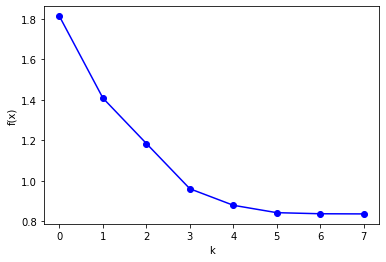

In [ ]:
plt.plot(f(xs2[0:i2+1,0],xs2[0:i2+1,1]),'-bo')
plt.xlabel('k')
plt.ylabel('f(x)')

#Newton's method
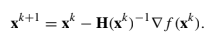


## Programación del método

In [ ]:
from scipy import optimize

In [ ]:
def nm(x, max_iter, epsi): #Método de Newton   
  #Entradas:
    #x: x0 valor inicial. 
    #max_iter: número máximo de iteraciones permitidas.
    #epsi: tolerancia del método
  #Salidas:
    #xs: vector con los xk hallados
    #i+1: número de iteraciones realizadas 
  xs = np.zeros((1 + max_iter, 2))
  xs[0,:] = x
  for i in range(max_iter):
      Hk = H(x[0],x[1]) #Inversa de la matriz Hessiana evaluada en xk
      x = x - np.linalg.inv(Hk)@grad(x[0],x[1]) #Cálculo x_{k+1}
      xs[i+1,:] = x
      error = abs(f(xs[i+1,0],xs[i+1,1])-f(xs[i,0],xs[i,1]))/max(1,abs(f(xs[i,0],xs[i,1]))) #Cálculo del error
      if error < epsi: #Verifiación del error
        break
  return xs,i+1

## Example 10
Find the minimizer of $f (x) = − ln(1−x_1−x_2)−ln(x_1)−ln(x_2)$.

In [ ]:
def f(x1,x2): #Función objetivo
    return -np.log(1-x1-x2) - np.log(x1) - np.log(x2)

In [ ]:
def grad(x1,x2): #Gradiente de f
    return np.array([-1/x1 + 1/(1 - x1 - x2), -1/x2 + 1/(1 - x1 - x2)])

In [ ]:
def H(x1,x2): #Hessiana de f
  return np.array([[1/x1**2 + 1/(1 - x1 - x2)**2, 1/(1 - x1 - x2)**2],[1/(1 - x1 - x2)**2, 1/x2**2 + 1/(1 - x1 - x2)**2]])

In [ ]:
x = np.array([1/8,1/3])
max_iter = 1000
epsi = 0.001;

In [ ]:
xs,i = nm(x,max_iter,epsi)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


0.3333258237083114 0.3333359290295141


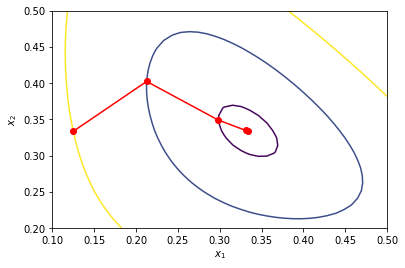

In [ ]:
xx = np.linspace(0.1, 0.5, 40)
yy = np.linspace(0.2, 0.5, 30)
X,Y = np.meshgrid(xx, yy)
Z = -np.log(1-X-Y) - np.log(X) - np.log(Y);
function_value=f(xs[0:i+1,0],xs[0:i+1,1])
c = plt.contour(X, Y, Z,np.flip(function_value))
plt.plot(xs[0:i+1,0],xs[0:i+1,1] , '-ro')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
print(xs[i,0],xs[i,1])

Text(0, 0.5, 'f(x)')

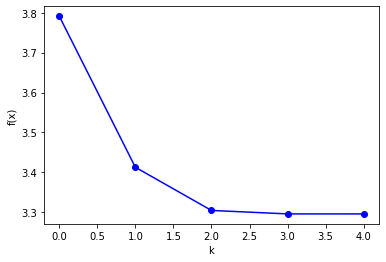

In [ ]:
plt.plot(f(xs[0:i+1,0],xs[0:i+1,1]),'-bo')
plt.xlabel('k')
plt.ylabel('f(x)')